In [401]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import linprog
from funcoes_auxiliares import *
from funcoes_graficos import *
from gerador_de_problemas import *
from gradiente_circuncentro import *
from funcoes_tabelas import *
from gradiente_circuncentro_w import *
from scipy import optimize

In [2]:
n = 2
c,A,b = gerar_problema_otimizacao_linear_factivel_limitado(4,n)
historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico_w(np.ones(n) * 0.1,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao, lista_alphas, tamanho_passo)
df

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
0,0,"[0.1, 0.1]",-1.600000,[],"[0.7893522173763263, 0.6139406135149205]",1.858064e+00,1.114838e+00
1,1,"[0.98, 0.7844444444444445]",-14.311111,[],"[0.7893522173763263, 0.6139406135149205]",7.432255e-01,7.432255e-01
2,2,"[1.5666666666666664, 1.2407407407407407]",-22.785185,"[[0.48564293117863205, 0.8741572761215377]]","[0.1518546430988471, -0.13010833130330868]",7.695574e+00,9.233305e-01
3,3,"[2.2678318850477677, 0.6399857379970829]",-24.890387,[],"[0.7893522173763263, 0.6139406135149205]",2.006887e-01,2.006887e-01
4,4,"[2.4262459627800523, 0.7631966873444154]",-27.178590,"[[0.48564293117863205, 0.8741572761215377]]","[0.1518546430988471, -0.13010833130330868]",3.120388e+00,3.743905e-01
5,5,"[2.7105532411898228, 0.5196035721361962]",-28.032204,[],"[0.7893522173763263, 0.6139406135149205]",8.137492e-02,8.137492e-02
6,6,"[2.7747867115919163, 0.5695629380044911]",-28.960021,"[[0.48564293117863205, 0.8741572761215377]]","[0.1518546430988471, -0.13010833130330868]",1.265250e+00,1.518072e-01
7,7,"[2.8900671425628053, 0.47079121657753853]",-29.306143,[],"[0.7893522173763263, 0.6139406135149205]",3.299576e-02,3.299576e-02
8,8,"[2.9161124207284823, 0.4910486551508429]",-29.682352,"[[0.48564293117863205, 0.8741572761215377]]","[0.1518546430988471, -0.13010833130330868]",5.130313e-01,6.155453e-02
9,9,"[2.962856133514054, 0.45099886579080944]",-29.822697,[],"[0.7893522173763263, 0.6139406135149205]",1.337907e-02,1.337907e-02


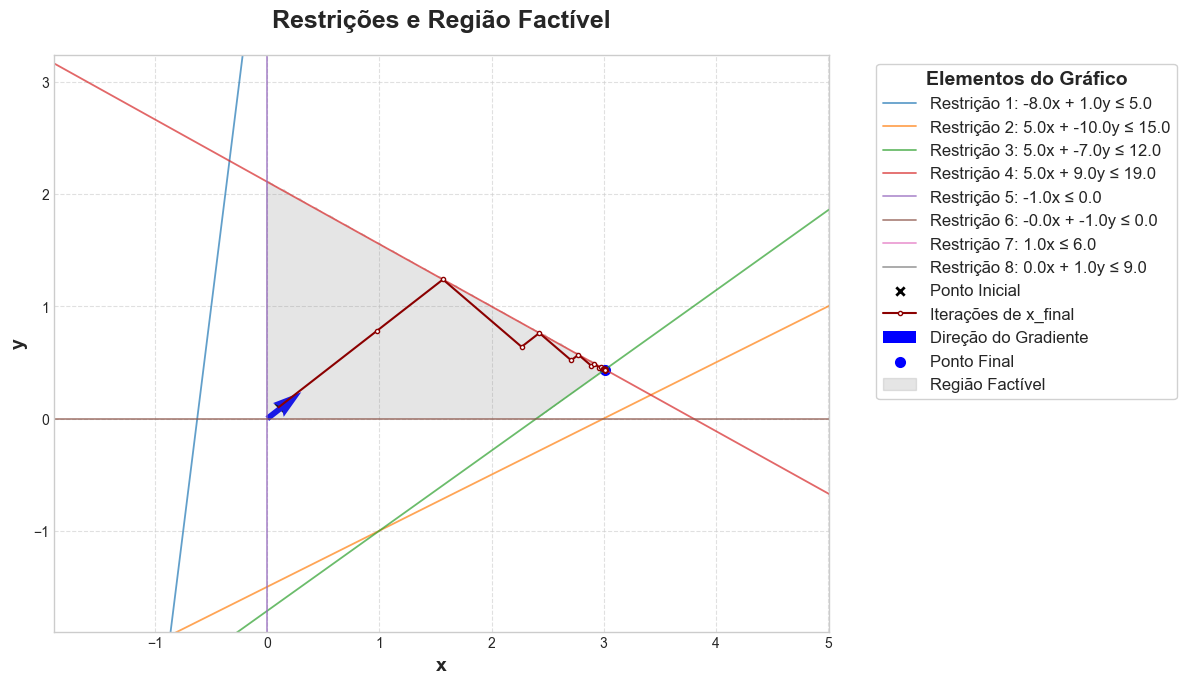

In [3]:
grafico1(historico_solucao,A,b,gradiente)

In [22]:
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")
result

/var/folders/zh/bx7x26nx027c6gpblpnfycnm0000gn/T/ipykernel_8151/418667290.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -66.0
       x: [ 1.300e+01  8.000e+00]
     nit: 8

In [17]:
np.array([1,1,1])/2

array([0.5, 0.5, 0.5])

# Desenvolvendo algoritmo que gera problemas aleátorios de PL

In [402]:
def add_support(A,b,alpha):
    A0 = A.copy()
    b0 = b.copy()
    n = A.shape[1]
    A1 = np.zeros((n,n))
    A2 = np.zeros((n,n))
    A3 = np.zeros((1,n))
    b1 = np.zeros(n)
    b2 = np.zeros(n)
    b3 = np.zeros(1)
    for i in range(n):
        A1[i,i] = 1
        A2[i,i] = -1
        A3[0,i] = 1
        b1[i] = alpha
        b2[i] = 0
        b3[0] = (n - 1) * alpha + alpha / 2
    A0 = np.vstack((A0,A1))
    A0 = np.vstack((A0,A2))
    A0 = np.vstack((A0,A3))
    b0 = np.hstack((b0,b1))
    b0 = np.hstack((b0,b2))
    b0 = np.hstack((b0,b3))

    return A0, b0 


In [458]:
def dist(a,b,h):
     return np.abs(np.dot(a,h) - b)/np.linalg.norm(a)

def proj(a,b,h):
    return h - (np.dot(a,h) - b) * a / np.linalg.norm(a)**2

def like(a,b,at,bt,L,S):

     if np.linalg.norm(a/np.linalg.norm(a) - at/np.linalg.norm(at)) < L:
          if np.linalg.norm(b/np.linalg.norm(a) - bt/np.linalg.norm(at)) < S:
               return False
     return True

In [459]:
def gera_pl(n,d,alpha,theta,pho,Smin,Lmax,amax,bmax):
    A = np.zeros((d,n))
    b = np.zeros(d)
    c = np.zeros(n)
    A, b = add_support(A,b,alpha)
    h = np.full(n, alpha/2)
    for j in range(1,n+1):
        c[j-1] = - theta * j
    if d == 0:
        return A, b, c
    i = 0
    while i < d:
        A[i,:] = np.random.uniform(0,amax,n) * np.random.choice([1, -1], size=n)
        b[i] = np.random.uniform(0,bmax,1) * np.random.choice([1, -1], size=1)
        if np.dot(A[i,:],h) > b[i]:
            A[i,:] = -A[i,:]
            b[i] = -b[i]
        if dist(A[i,:],b[i],h) < pho or dist(A[i,:],b[i],h) > theta:
            continue
        if np.dot(c,proj(A[i,:],b[i],h)) > np.dot(c,h):
            continue
        if i > 0:
            for k in range(i):
                if like(A[i,:],b[i],A[k,:],b[k],Lmax,Smin) == False:
                    continue
        i += 1
    return A, b, c, h
        

            



    


In [543]:
n = 2
d = 10
alpha = 20
theta = 5
pho = 2
Smin = 5
Lmax = 0.2
amax = 100
bmax = 10000
A,b,c,h  = gera_pl(n,d,alpha,theta,pho,Smin,Lmax,amax,bmax)

/var/folders/zh/bx7x26nx027c6gpblpnfycnm0000gn/T/ipykernel_8178/1522326655.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[i] = np.random.uniform(0,bmax,1) * np.random.choice([1, -1], size=1)


In [544]:
historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico(h,c,A,b,max_iter=1000000)
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")

/var/folders/zh/bx7x26nx027c6gpblpnfycnm0000gn/T/ipykernel_8178/3023609473.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")


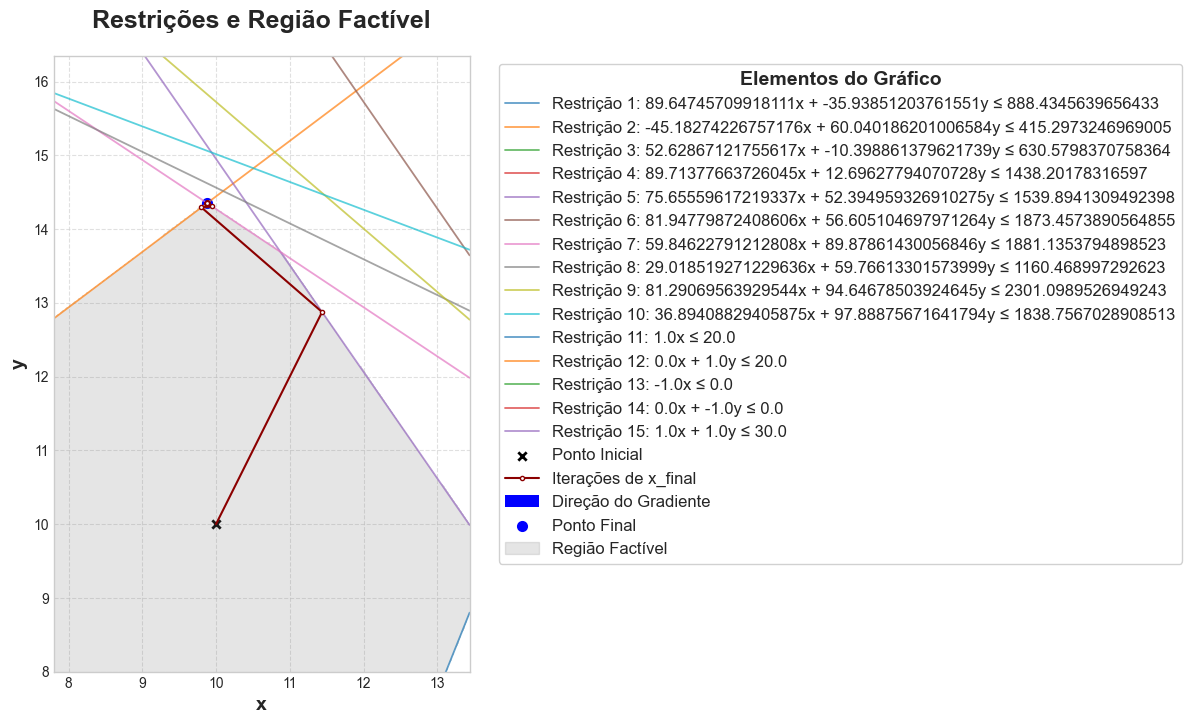

In [545]:
grafico1(historico_solucao,A,b,gradiente)

In [541]:
df = cria_tabela(historico_solucao, valores_funcao_objetivo, restricoes_ativas, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(10)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
9,9,"[104.54551606416591, 128.40151085687938]",-18067.426889,"[[0.4836673352006487, 0.8752519116573831]]","[-0.0182268698503453, 0.009587639671266524]",2.031928e-04,4.184694e-06
10,10,"[104.5455123605973, 128.40151280501868]",-18067.426899,"[[-0.30474849241471713, 0.9524328618705662]]","[0.37598104395733756, -0.02900283543532517]",5.508104e-07,2.077095e-07
11,11,"[104.54551256769155, 128.4015127890436]",-18067.426907,"[[0.4836673352006487, 0.8752519116573831]]","[-0.0182268698503453, 0.009587639671266524]",5.333366e-06,1.098391e-07
12,12,"[104.54551247048099, 128.401512840178]",-18067.426908,"[[-0.30474849241471713, 0.9524328618705662]]","[0.37598104395733756, -0.02900283543532517]",1.445769e-08,5.451971e-09
13,13,"[104.54551247591681, 128.40151283975868]",-18067.426908,"[[0.4836673352006487, 0.8752519116573831]]","[-0.0182268698503453, 0.009587639671266524]",1.399905e-07,2.883065e-09
14,14,"[104.54551247336522, 128.40151284110087]",-18067.426908,"[[-0.30474849241471713, 0.9524328618705662]]","[0.37598104395733756, -0.02900283543532517]",3.793623e-10,1.430578e-10
15,15,"[104.54551247350786, 128.40151284108987]",-18067.426908,"[[0.4836673352006487, 0.8752519116573831]]","[-0.0182268698503453, 0.009587639671266524]",3.672169e-09,7.563137e-11
16,16,"[104.54551247344092, 128.40151284112508]",-18067.426908,"[[-0.30474849241471713, 0.9524328618705662]]","[0.37598104395733756, -0.02900283543532517]",9.933244e-12,3.748246e-12
17,17,"[104.54551247344466, 128.4015128411248]",-18067.426908,"[[0.4836673352006487, 0.8752519116573831]]","[-0.0182268698503453, 0.009587639671266524]",9.584982e-11,1.970395e-12
18,18,"[104.54551247344291, 128.4015128411257]",-18067.426908,"[[0.4836673352006487, 0.8752519116573831], [-0...",[nan],NaN,NaN


In [542]:
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -18067.426907784717
       x: [ 1.045e+02  1.284e+02]
     nit: 13